## Installing Necessary Libraries

In [1]:
#pip install keybert
#pip install owlready2
#pip install wordcloud
#pip install --user keyphrase-vectorizers

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import math
import nltk
import contractions

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

from keybert import KeyBERT
from pdfminer.high_level import extract_text
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from collections import Counter
from transformers import BertTokenizer
from owlready2 import *
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from keyphrase_vectorizers import KeyphraseCountVectorizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\a_erd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a_erd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\a_erd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Extracting pdf file to text

In [3]:
text = extract_text(r"C:\Users\a_erd\Desktop\03_BERT for ESG Ontology Development\03_ESG Reports_PDFDocuments\Transportation\CathayPacific_CX_SDR2015_main_text.pdf", 'rb')

In [4]:
text

'Sustainable Development Report 2015\n\nTogether for Tomorrow\n\nMessage from the Chief Executive\n2015 was a good year for Cathay Pacific. We recorded our best financial performance  \nin the last five years, which was a tremendous achievement by the team especially  \nunder challenging circumstances. This year we made great strides revamping our  \nbrand philosophy, introduced new products and services, and advancing technological \ninnovation. I believe these efforts will really help lay a strong foundation to better position \nourselves for many years to come.\nThe industry in which we are operating remains challenging as a result of economic \noutlook, volatility in fuel prices and increasing regulation. I see sustainability as a key \nstrategic value to help mitigate some of these risks, place us in a competitive position, \nand providing us with the licence to grow in the future.\n\n“We want our business to be successful  \nand we got to make it sustainable. I ask \neveryone to 

## Pre-processing functions

In [5]:
## text level processors

# replace brackets,\n, and \x0c with whitespace
text = text.replace('(', '')
text = text.replace(')', '')
text = text.replace('[', '')
text = text.replace(']', '')
text = text.replace('\n', ' ')
text = text.replace('\x0c', '. ')
text = text.replace("’s", '') #removing possessive apostrophes

#removing uniceods like \u220c
text = text.encode("ascii", "ignore")
text = text.decode()

# replacing contractions
text = contractions.fix(text)

# filter all digits from characters in string & join remaining characters
text = ''.join(filter(lambda item: not item.isdigit(), text))

#converting all uppercase characters to lowercase
text = text.lower()
    
#removing special characters
text = re.sub('\(|\)|:|,|;|\.|’||“”•|\?|%|>|<*', '', text)
text = re.sub('/', ' ', text)
text = text.replace("'",'')

#removing stopwords
stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)
text = ' '.join([word for word in text.split() if word not in stopwords_dict])

text

'sustainable development report together tomorrow message chief executive good year cathay pacific recorded best financial performance last five years tremendous achievement team especially challenging circumstances year made great strides revamping brand philosophy introduced new products services advancing technological innovation believe efforts really help lay strong foundation better position many years come industry operating remains challenging result economic outlook volatility fuel prices increasing regulation see sustainability key strategic value help mitigate risks place us competitive position providing us licence grow future want business successful got make sustainable ask everyone innovative contribute environment future ivan chu chief executive message chief executive landmark year climate change paris agreement making significant statement progress towards solution global climate change welcome call governments businesses act collective responsibility end continued in

## Using KeyBert to get keywords from text

In [6]:
kw_model = KeyBERT(model='all-mpnet-base-v2')

keywords = kw_model.extract_keywords(text, 

                                     keyphrase_ngram_range=(1,1), # To get the length of the resulting keywords/keyphrases
                                     
                                     stop_words='english', 

                                     highlight=True, # Highlighting the keywords in the document

                                     top_n=141)

sustainable development report together tomorrow message chief executive good year cathay 
pacific recorded best financial performance last five years tremendous achievement team 
especially challenging circumstances year made great strides revamping brand philosophy 
introduced new products services advancing technological innovation believe efforts really 
help lay strong foundation better position many years come industry operating remains 
challenging result economic outlook volatility fuel prices increasing regulation see 
sustainability key strategic value help mitigate risks place us competitive position 
providing us licence grow future want business successful got make sustainable ask everyone 
innovative contribute environment future ivan chu chief executive message chief executive 
landmark year climate change paris agreement making significant statement progress towards 
solution global climate change welcome call governments businesses act collective 
responsibility end continued invest new fleet make airline efficient possible also helps 
minimise carbon footprint also actively explore avenues sustainable alternative fuel order 
reduce reliance use fossil-based fuel last year retired less fuel efficient aircraft worked 
closely manufacturer supplier embark innovative solution recycle aircraft weight could 
recovered also introduced different ways engage staff using internal social media platforms 
like yammer better facilitate dialogues staff well crowdsourcing platform made easier staff 
contribute ideas sustainability looking ahead promises eventful year us aviation industry 
excited receiving first batch new aircraft offer latest advances technology operations 
passenger comfort navigation deliver step change efficiency environmental benefits really 
help us meet carbon reduction objectives another big occasion icao th assembly autumn eyes 
icao reach agreement key construct market-based measures cap aviation emissions levels 
international effort agree design scheme together easy process cannot stress enough 
importance parties involved work together reach agreement fail uncertainty patchwork 
regulations globally certainly make industry less efficient competitive together developed 
strong capability sustainability years look forward team continuing make efforts strategy 
carrying innovating making airline sustainable possible tomorrow ivan chu chief executive 
want find go video right ivan chu chief executive talks latest sustainable development report
video video working towards sustainable future highlights cathay pacific make aviation 
sustainable together tomorrowcathay pacific sustainable development report together tomorrow 
together tomorrow introduction cathay pacific sustainable development report sustainability 
constant pursuit years cathay pacific believe sustainability successful teams work together 
achieve common long-term goals issues fuel efficiency really tackled cross departments 
operations engineering product services teams working related solutions focus staff 
engagement year platforms reflects ambition applications like yammer crowd sourcing tools 
allow us break silos enable us work together effectively working together also extends 
partnerships stakeholders outside airline continue participate stay touch industry 
associations governments ngos global community address solve problems industry faces year 
seen continuation sustainability efforts continue make steady steps improve efficiencies 
reduce impacts well making inroads better integrating communicating efforts throughout report
find details new initiatives pursing past year together new videos tell stories mark historic
moment aviation environment icao market-based measures expected agreed really game changing 
deal carbon emissions industry company continue progress commitments already laying 
foundations tomorrow challenges sustainability successful teams work together achieve common 
long-term goals john slosar chairman t

In [7]:
keywords

[('iata', 0.4505),
 ('boeing', 0.4214),
 ('sustainability', 0.4054),
 ('airbus', 0.4035),
 ('airlines', 0.3899),
 ('partnership', 0.375),
 ('stakeholder', 0.3749),
 ('aviation', 0.3675),
 ('airline', 0.3628),
 ('partnerships', 0.3618),
 ('stakeholders', 0.3612),
 ('organisational', 0.3569),
 ('flights', 0.3499),
 ('achieving', 0.3455),
 ('aerospace', 0.3443),
 ('aircraft', 0.3434),
 ('achieve', 0.341),
 ('icao', 0.3407),
 ('companies', 0.3376),
 ('flight', 0.3355),
 ('partnering', 0.335),
 ('sustainable', 0.3349),
 ('cathaypacificcom', 0.3323),
 ('organisations', 0.3305),
 ('industry', 0.3302),
 ('organisation', 0.3297),
 ('success', 0.3233),
 ('merger', 0.3191),
 ('business', 0.3176),
 ('environmental', 0.3168),
 ('organization', 0.3166),
 ('stewardship', 0.3129),
 ('initiatives', 0.3129),
 ('emissions', 0.3117),
 ('company', 0.3102),
 ('inspire', 0.3086),
 ('innovating', 0.3064),
 ('pricewaterhousecoopers', 0.3037),
 ('fuelstechnologyin', 0.3035),
 ('stewards', 0.2989),
 ('environmen

In [8]:
#To get just keys from keywords dictionary

keywords_list= list(dict(keywords).keys())
print(keywords_list)

['iata', 'boeing', 'sustainability', 'airbus', 'airlines', 'partnership', 'stakeholder', 'aviation', 'airline', 'partnerships', 'stakeholders', 'organisational', 'flights', 'achieving', 'aerospace', 'aircraft', 'achieve', 'icao', 'companies', 'flight', 'partnering', 'sustainable', 'cathaypacificcom', 'organisations', 'industry', 'organisation', 'success', 'merger', 'business', 'environmental', 'organization', 'stewardship', 'initiatives', 'emissions', 'company', 'inspire', 'innovating', 'pricewaterhousecoopers', 'fuelstechnologyin', 'stewards', 'environmentally', 'management', 'wwwcathaypacificcom', 'managementcathay', 'develop', 'successful', 'organise', 'executive', 'ecotourism', 'aeronautics', 'progress', 'leadership', 'corporate', 'developments', 'industrial', 'consolidating', 'managing', 'revamping', 'collaborations', 'efficiencies', 'collaborate', 'charter', 'dow', 'flying', 'biofuels', 'businesses', 'innovation', 'biodiversitycathay', 'economy', 'accountants', 'partners', 'procu

## Keywords Cloud

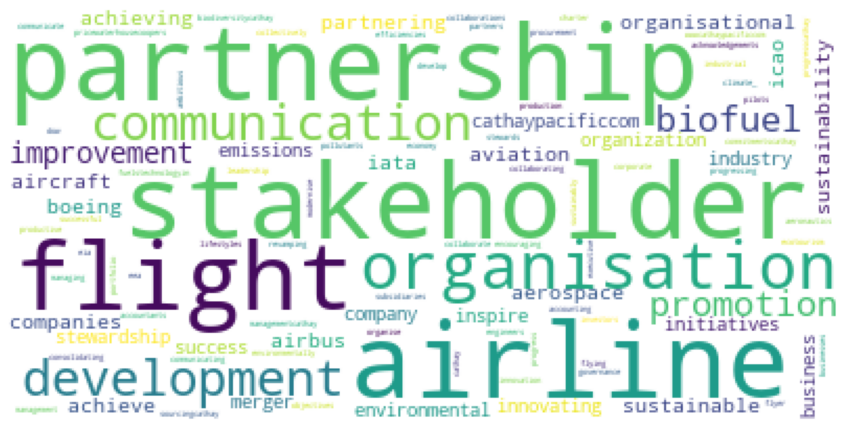

In [9]:
#Creating keywords cloud to get insights on the most frequently used words

%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords.words('english'),
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(' '.join(keywords_list))
fig = plt.figure(1)
fig.set_size_inches(15,12)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Visualize top N uni-grams, bi-grams & tri-grams using vector of word counts

In [10]:
# Converting string to a list
text = [text]

In [11]:
# Function to get top n-grams
def get_top_nK_words(text, K=1, n=None):
    vec1 = CountVectorizer(max_df=10,stop_words=stopwords.words('english'), ngram_range=(K,K),  
            max_features=2000).fit(text)
    bag_of_words = vec1.transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

### Top Uni-grams

             Words  Freq
0          pacific   246
1      sustainable   235
2           cathay   190
3           report   189
4      development   158
5   sustainability    89
6             fuel    86
7             hong    84
8             kong    84
9        emissions    74
10           group    73
11         climate    69
12          safety    69
13        aircraft    67
14           staff    67
15            year    59
16          change    56
17      management    53
18           waste    52
19     commitments    48


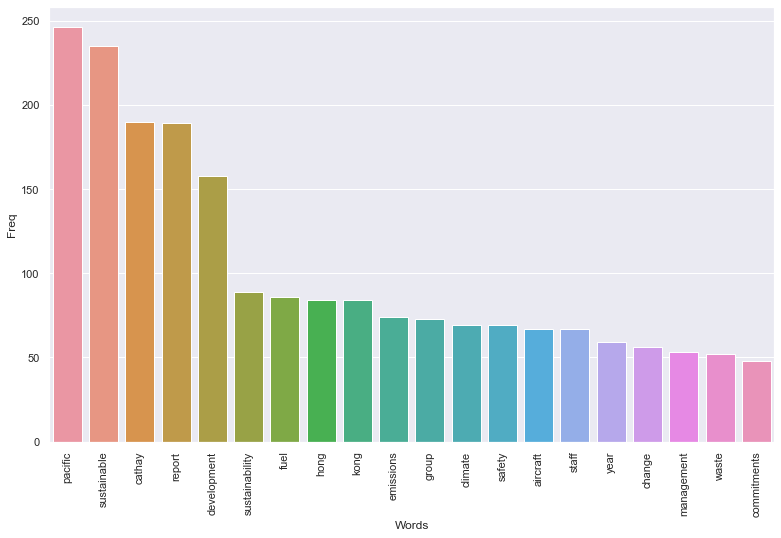

In [12]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_nK_words(text, K=1, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Words", "Freq"]
print(top_df)

#Barplot of most freq words
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Words", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
fig = g.get_figure()

### Top Bi-grams

                       Bi-gram  Freq
0               cathay pacific   173
1      sustainable development   143
2           development report   107
3          pacific sustainable    88
4                    hong kong    84
5               climate change    52
6            pacific dragonair    25
7                   cabin crew    23
8                 supply chain    22
9                pacific group    20
10        sustainable sourcing    19
11              report updates    19
12  sustainability information    19
13                   want find    18
14                     find go    18
15             fuel efficiency    18
16            waste management    18
17   identified sustainability    18
18                co emissions    17
19        development strategy    16


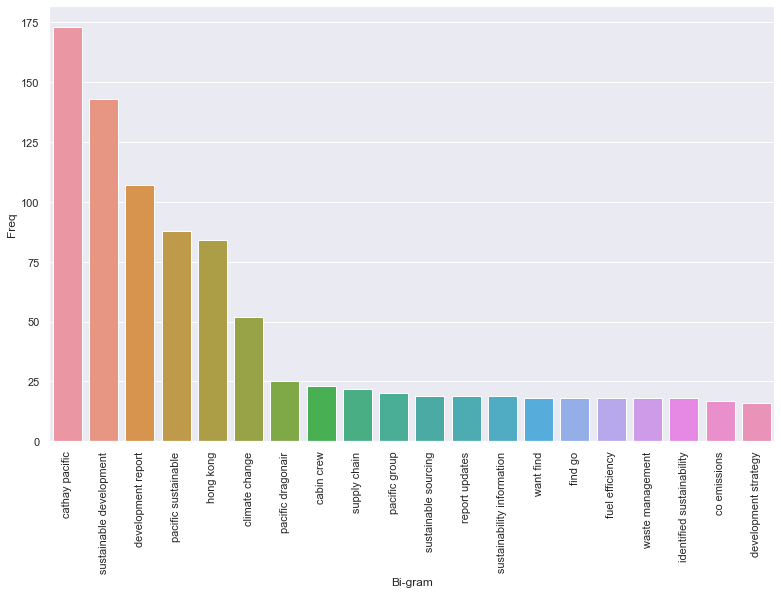

In [13]:
# Top bi-grams
top2_words = get_top_nK_words(text, K=2, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=90)
fig = h.get_figure()

### Top Tri-grams

                                 Tri-gram  Freq
0          sustainable development report   107
1         pacific sustainable development    88
2                cathay pacific dragonair    25
3                    cathay pacific group    20
4              cathay pacific sustainable    19
5              development report updates    19
6                            want find go    18
7   identified sustainability information    18
8        sustainable development strategy    15
9          development report sustainable    13
10           climate changecathay pacific    13
11       changecathay pacific sustainable    13
12                  report cathay pacific    12
13     progresscathay pacific sustainable    12
14         report sustainable development    11
15            development report overview    11
16                 cathay pacific airways    11
17        together tomorrowcathay pacific    10
18     tomorrowcathay pacific sustainable    10
19       approach sustainable developmen

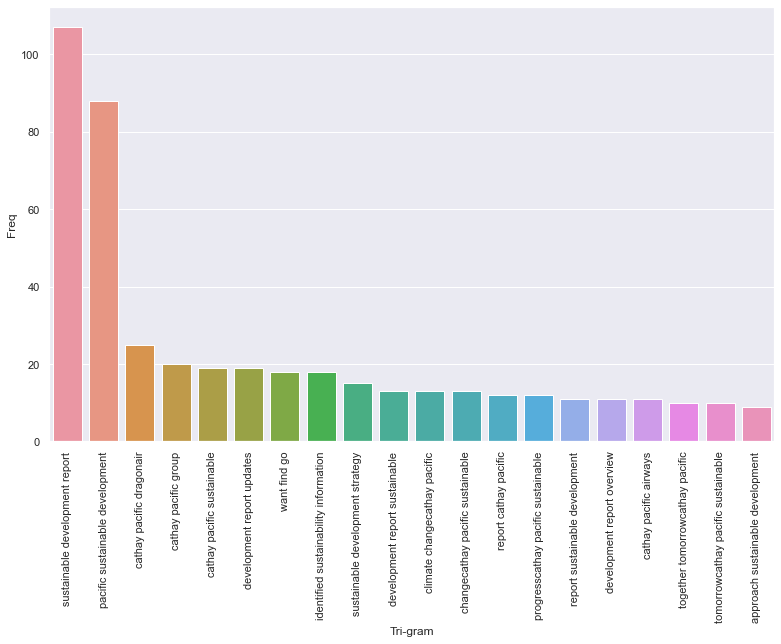

In [14]:
top3_words = get_top_nK_words(text, K=3, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)

#Barplot of most freq Tri-grams
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=90)
fig = j.get_figure()

In [15]:
#Converting list to string again
text = ''.join(text)

## Loading an ontology from OWL files

In [16]:
ESG_MM = get_ontology("file://D:/Jacobs/Semester 2/Advanced Project 1/ESG_MM_KPIs.owl").load()

In [17]:
list(ESG_MM.classes())

[ESG_MM_KPIs.Access_to_Basic_Services,
 ESG_MM_KPIs.Social,
 ESG_MM_KPIs.Access_to_Healthcare,
 ESG_MM_KPIs.Animal_Welfare,
 ESG_MM_KPIs.Anti-Competitive_Practices,
 ESG_MM_KPIs.AuM_under_ESG,
 ESG_MM_KPIs.E,
 ESG_MM_KPIs.Audit,
 ESG_MM_KPIs.Governance,
 ESG_MM_KPIs.Biodiversity,
 ESG_MM_KPIs.Environment,
 ESG_MM_KPIs.Board,
 ESG_MM_KPIs.Board_Diversity,
 ESG_MM_KPIs.Board_Gender_Diversity,
 ESG_MM_KPIs.Building_Certification,
 ESG_MM_KPIs.Business_Ethics,
 ESG_MM_KPIs.CO2_Emission_of_Fleet_of_Sold_Leased,
 ESG_MM_KPIs.Certification_of_Facilities,
 ESG_MM_KPIs.S,
 ESG_MM_KPIs.Chairman_Ceo_Separation,
 ESG_MM_KPIs.Child_Labor,
 ESG_MM_KPIs.Climate_Risk_Management,
 ESG_MM_KPIs.Clinical_Trials,
 ESG_MM_KPIs.Others,
 ESG_MM_KPIs.Collective_Bargaining,
 ESG_MM_KPIs.Community_and_Society,
 ESG_MM_KPIs.Contributions_to_political_parties,
 ESG_MM_KPIs.Contributions_to_political_parties_KPI,
 ESG_MM_KPIs.G,
 ESG_MM_KPIs.Corruption,
 ESG_MM_KPIs.Customer_Relationship,
 ESG_MM_KPIs.Demographic_C

## Working on Ontologies with Simple Examples

In [18]:
#iri, for searching entities by its full IRI
#_case_sensitive: whether to take lower/upper case into consideration (default is True)

ESG_MM.search(iri = "*board*", _case_sensitive = False)

[ESG_MM_KPIs.Board, ESG_MM_KPIs.Board_Diversity, ESG_MM_KPIs.Board_Gender_Diversity]

In [19]:
#To search in all ontologies
default_world.search(iri = "*for*", _case_sensitive = False)

[ESG_MM_KPIs.Expenditure_for_Veterinary_Pharmaceuticals_Seeds_Herbicides_Pesticides_and_Other_Drugs, ESG_MM_KPIs.Forests, ESG_MM_KPIs.Maturity_of_workforce, ESG_MM_KPIs.Supplier_Agreements_and_Supply_Chain_Partners_Screened_for_Risk_of_ESG_Infringement]

In [20]:
#Board is a subclass of Social class
ESG_MM.Board.is_a

[ESG_MM_KPIs.Social]

In [21]:
#The subclasses() method gets the list of child classes
list(ESG_MM.Social.subclasses())

[ESG_MM_KPIs.Access_to_Basic_Services,
 ESG_MM_KPIs.Access_to_Healthcare,
 ESG_MM_KPIs.Animal_Welfare,
 ESG_MM_KPIs.Anti-Competitive_Practices,
 ESG_MM_KPIs.Board,
 ESG_MM_KPIs.Board_Diversity,
 ESG_MM_KPIs.Board_Gender_Diversity,
 ESG_MM_KPIs.Business_Ethics,
 ESG_MM_KPIs.Chairman_Ceo_Separation,
 ESG_MM_KPIs.Child_Labor,
 ESG_MM_KPIs.Community_and_Society,
 ESG_MM_KPIs.Discrimination_and_Diversity,
 ESG_MM_KPIs.Employee_Development,
 ESG_MM_KPIs.Employee_Turnover,
 ESG_MM_KPIs.HIV_Programmes,
 ESG_MM_KPIs.Health_and_Safety,
 ESG_MM_KPIs.Human_Rights,
 ESG_MM_KPIs.Indigenous_Rights,
 ESG_MM_KPIs.Labor_Practices,
 ESG_MM_KPIs.Public_Health,
 ESG_MM_KPIs.Remuneration]

In [22]:
keyword_df = pd.DataFrame (keywords_list, columns = ['keywords'])
print (keyword_df)

           keywords
0              iata
1            boeing
2    sustainability
3            airbus
4          airlines
..              ...
136          career
137      accordance
138          unicef
139           fuels
140         airways

[141 rows x 1 columns]


In [23]:
def read_ontology(path):
    onto = get_ontology(path)
    onto.load()

    # Read classes
    classes = []

    for cl in onto.classes():
        classes.append(cl)

    classes = list(set(classes))

    '''# Read properties
    properties = []

    for prop in onto.properties():
        properties.append(prop)

    properties = list(set(properties))'''

    return classes

def get_mappings(filename):
    mappings = []

    with open(filename) as f:
        soup = BeautifulSoup(f, 'xml')

    cells = soup.find_all('Class')

    for cell in cells:
        entity1 = cell.get_attribute_list

        mappings.append(entity1)

    return mappings


def get_path(cl):
    path = cl.name
    while True:
        try:
            path = path + '/' + cl.is_a[0].name
        except IndexError:
            break
        cl = cl.is_a[0]
        if cl == 'owl.Thing':
          #the very first node
            break

    return '/'.join(path.split('/')[::-1])


def get_classes_df(ont_path):
    data = []

    # Parse ontologies
    classes1 = read_ontology(ont_path)

    # Generate classes
    for class_ in classes1:
        data.append((class_.name.lower(), 
                     get_path(class_).lower(),''.join(class_.label).lower(),''.join(class_.comment).lower()))
    dataset = pd.DataFrame(data, columns=['Name','Path','label','comment'])

    return dataset

In [24]:
def iterative_levenshtein(s, t, costs=(1, 1, 1)):
    """ 
        iterative_levenshtein(s, t) -> ldist
        ldist is the Levenshtein distance between the strings 
        s and t.
        For all i and j, dist[i,j] will contain the Levenshtein 
        distance between the first i characters of s and the 
        first j characters of t
        
        costs: a tuple or a list with three integers (d, i, s)
               where d defines the costs for a deletion
                     i defines the costs for an insertion and
                     s defines the costs for a substitution

    Taken from python course example at: https://python-course.eu/applications-python/levenshtein-distance.php 
    """

    rows = len(s)+1
    cols = len(t)+1
    deletes, inserts, substitutes = costs
    
    dist = [[0 for x in range(cols)] for x in range(rows)]

    # source prefixes can be transformed into empty strings 
    # by deletions:
    for row in range(1, rows):
        dist[row][0] = row * deletes

    # target prefixes can be created from an empty source string
    # by inserting the characters
    for col in range(1, cols):
        dist[0][col] = col * inserts
        
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0
            else:
                cost = substitutes
            dist[row][col] = min(dist[row-1][col] + deletes,
                                 dist[row][col-1] + inserts,
                                 dist[row-1][col-1] + cost) # substitution

    #for r in range(rows):
        #print(dist[r])
    
 
    return dist[row][col]


def struc_similarity_matrix(path1,keyword_df):
    df1_ = get_classes_df(path1)
    df2_ = keyword_df

    costs=(1,1,1)

    entity_list = df1_['Name'].values
    entity_list2 = df2_['keywords'].values

    #l1 = df1_['Path'].values
    #l2 = df2_['Path'].values


    #Create empty matrix to fill
    M_sim = np.zeros((entity_list.shape[0],entity_list2.shape[0]))

    #Iterate and fill 
    for i in range(entity_list.shape[0]):
        u = entity_list2[i]
        for j in range(entity_list2.shape[0]):
            v = entity_list2[j]
          #similarity -> structural similarity 
            M_sim[i,j] = iterative_levenshtein(u,v,costs)

    DF_sim = pd.DataFrame(M_sim,columns=entity_list2,index=entity_list)

    return DF_sim

def sim_plot(sim_df,threshold):
    plot_df = sim_df
    plot_df[plot_df<threshold]=0.0
    rows = sim_df.shape[0]
    cols = sim_df.shape[1]

    plt.figure(figsize=((0.4*rows),(0.4*cols)))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    cg = sns.heatmap(sim_df, fmt="g", cmap=cmap,linewidths=0.5, linecolor='black')


In [25]:
sim_matrix = struc_similarity_matrix('D:/Jacobs/Semester 2/Advanced Project 1/ESG_MM_KPIs.owl',keyword_df)

In [26]:
sim_matrix

,iata,boeing,sustainability,airbus,airlines,partnership,stakeholder,aviation,airline,partnerships,...,improvements,crew,producing,relations,destinations,career,accordance,unicef,fuels,airways
load_factor,0.0,6.0,11.0,5.0,7.0,9.0,10.0,5.0,6.0,10.0,...,10.0,4.0,9.0,7.0,9.0,5.0,9.0,5.0,5.0,5.0
maturity_of_workforce,6.0,0.0,12.0,6.0,6.0,10.0,10.0,7.0,5.0,10.0,...,9.0,5.0,5.0,7.0,10.0,6.0,8.0,6.0,5.0,7.0
corruption,11.0,12.0,0.0,11.0,11.0,11.0,10.0,11.0,10.0,11.0,...,13.0,14.0,13.0,12.0,8.0,13.0,13.0,11.0,12.0,12.0
esg_kpi,5.0,6.0,11.0,0.0,4.0,9.0,10.0,6.0,4.0,9.0,...,10.0,5.0,8.0,7.0,10.0,5.0,8.0,6.0,5.0,3.0
governance,7.0,6.0,11.0,4.0,0.0,8.0,9.0,6.0,1.0,9.0,...,9.0,6.0,8.0,7.0,9.0,6.0,7.0,6.0,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
forests,5.0,6.0,13.0,5.0,6.0,7.0,7.0,7.0,6.0,8.0,...,9.0,3.0,9.0,8.0,11.0,0.0,8.0,5.0,5.0,6.0
employee_development,9.0,8.0,13.0,8.0,7.0,10.0,10.0,8.0,6.0,10.0,...,10.0,8.0,9.0,9.0,11.0,8.0,0.0,9.0,10.0,7.0
collective_bargaining,5.0,6.0,11.0,6.0,6.0,10.0,10.0,7.0,6.0,11.0,...,11.0,5.0,8.0,8.0,10.0,5.0,9.0,0.0,6.0,7.0
unions,5.0,5.0,12.0,5.0,6.0,9.0,9.0,8.0,6.0,10.0,...,10.0,4.0,8.0,7.0,11.0,5.0,10.0,6.0,0.0,6.0


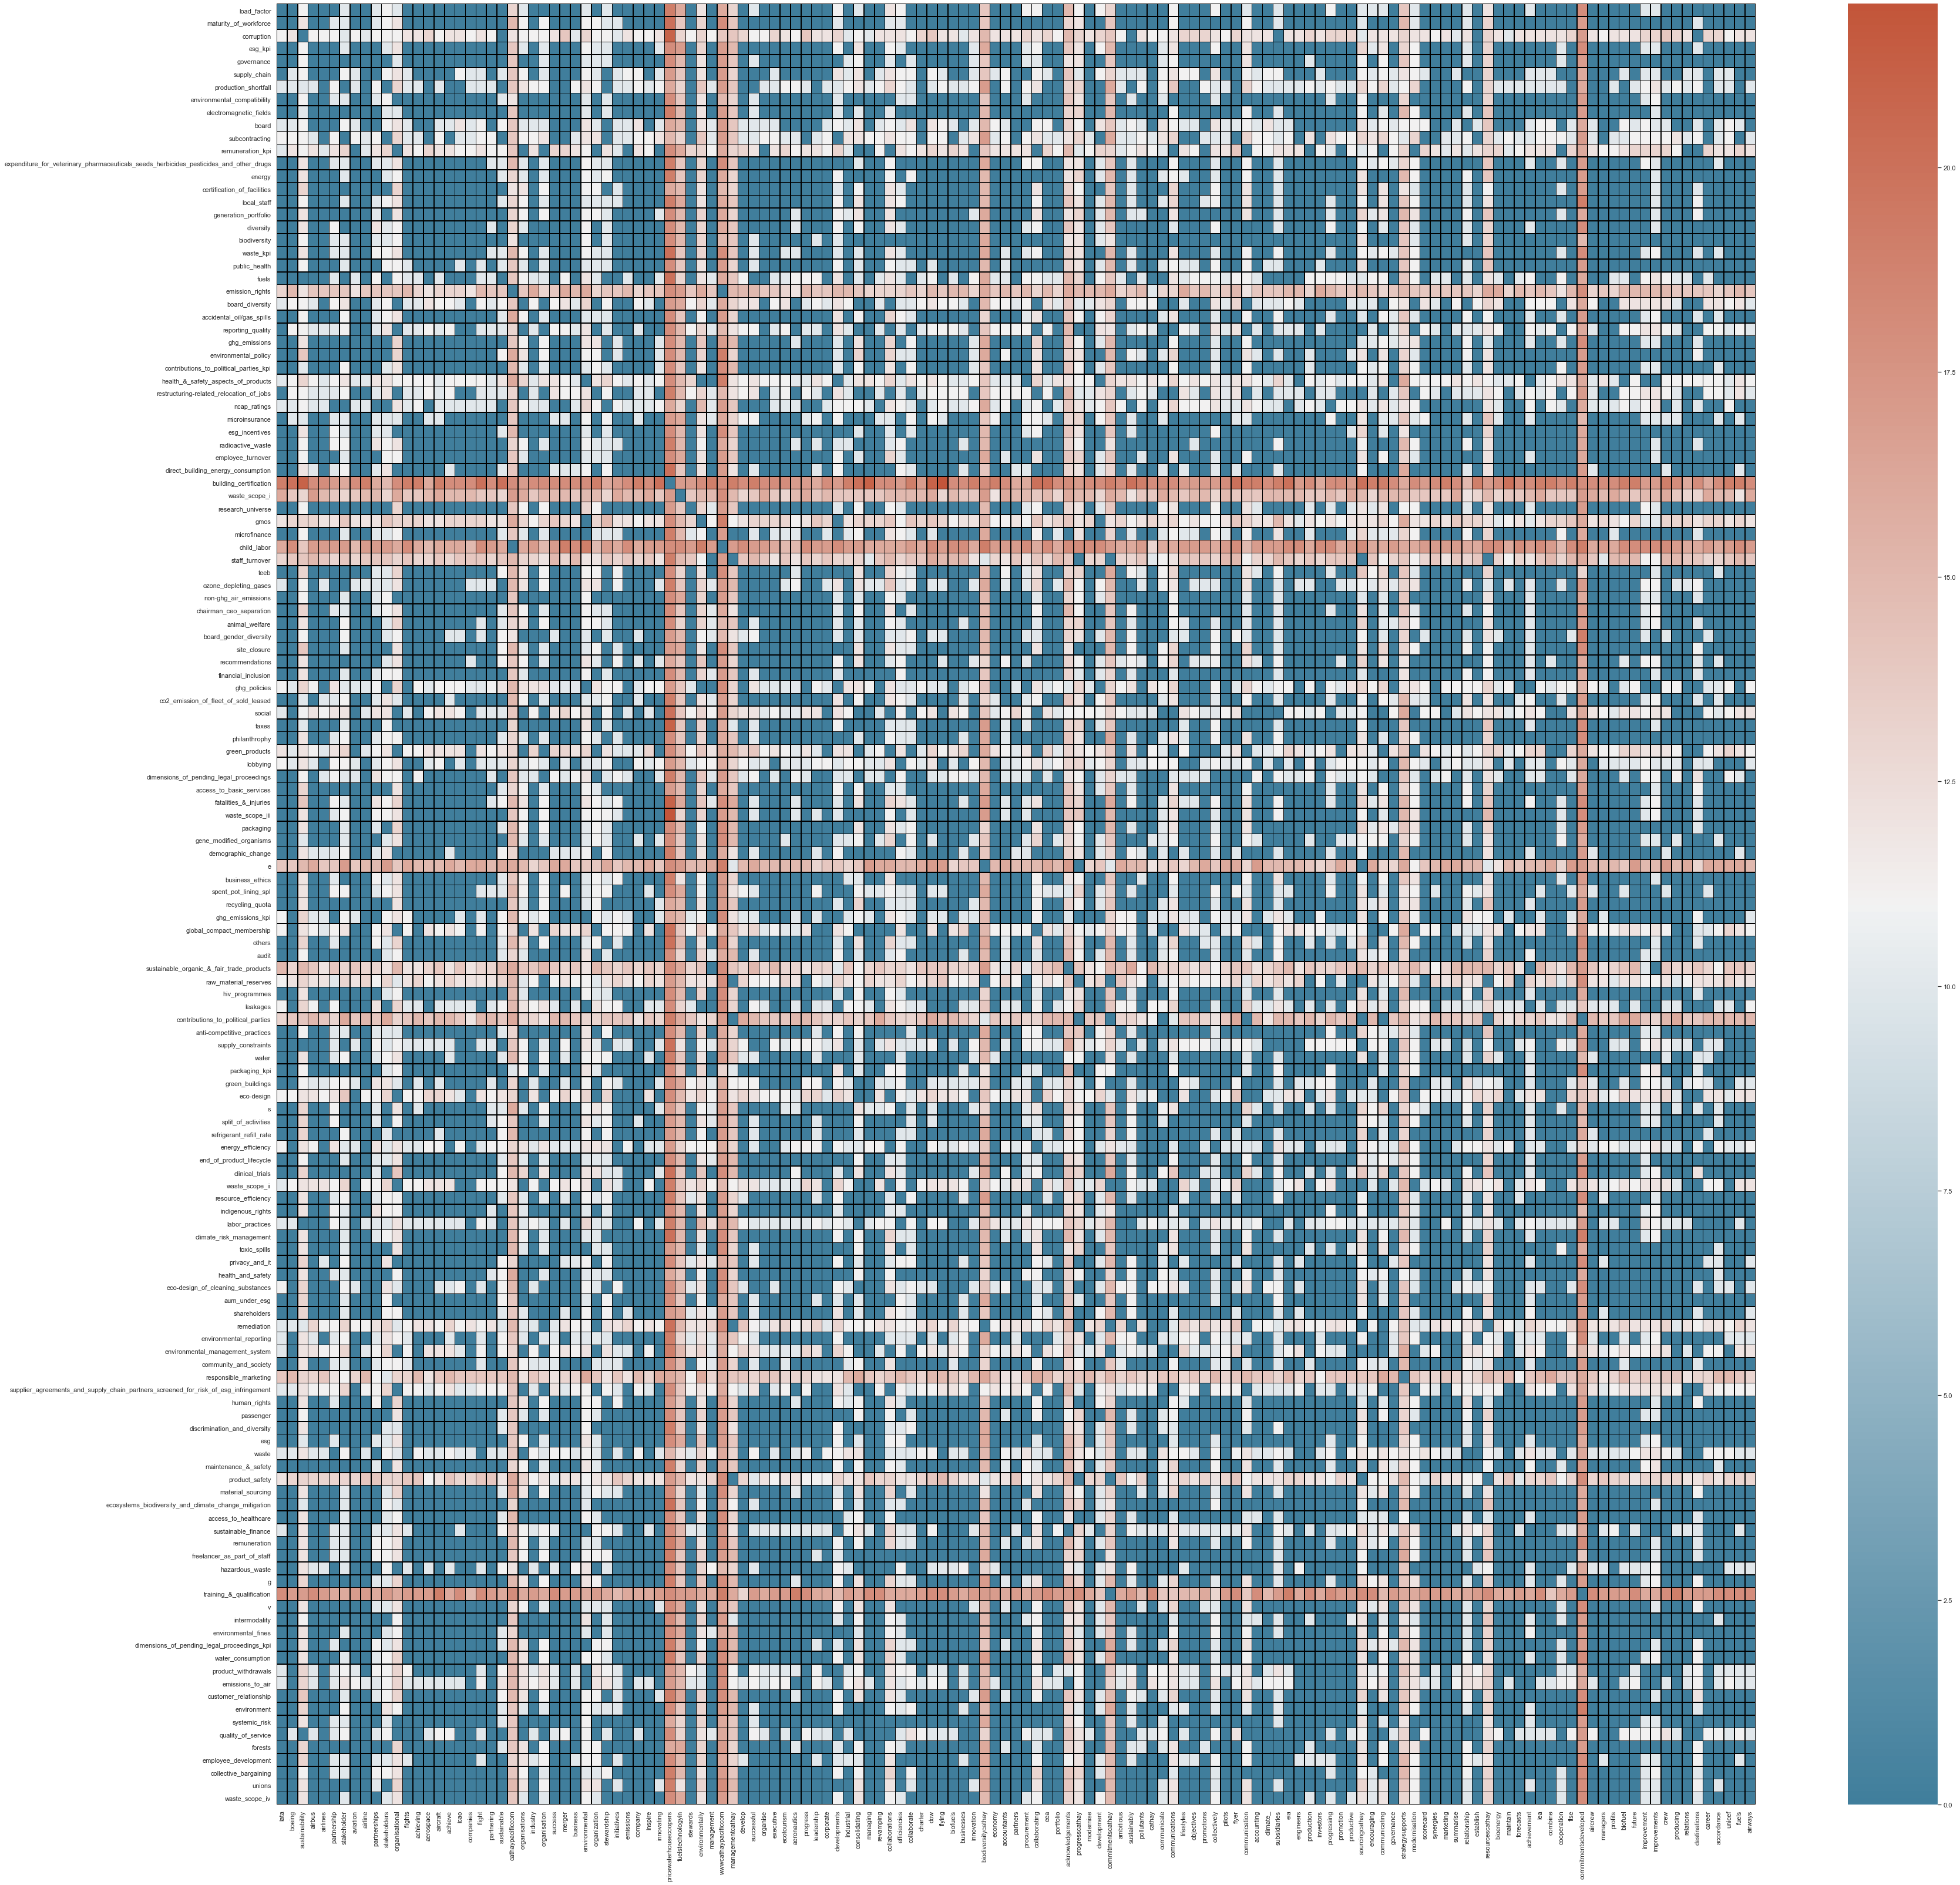

In [29]:
sim_plot(sim_matrix,1)